## **IMPORTING DATA**

In [45]:
from google.colab import files
uploaded = files.upload()


Saving Fake.csv to Fake (1).csv


In [46]:
from google.colab import files
uploaded = files.upload()

Saving True.csv to True (1).csv


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df_fake=pd.read_csv('Fake.csv')
df_true=pd.read_csv('True.csv')

In [49]:
df_fake['label'] = 1
df_true['label'] = 0


In [50]:
df=pd.concat([df_fake,df_true]).reset_index(drop=True)

In [51]:
df=df.drop(columns=['date'])
print("shape of dataset", df.shape)
df.head()

shape of dataset (44898, 4)


,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,1


In [52]:
df.isnull().sum()

,0
title,0
text,0
subject,0
label,0


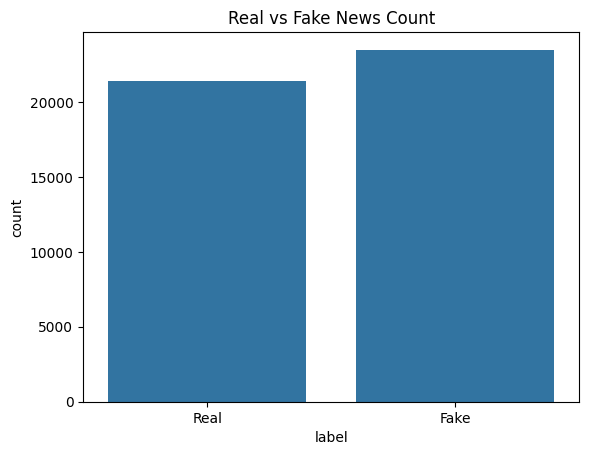

In [53]:
sns.countplot(x='label', data=df)
plt.title('Real vs Fake News Count')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()

In [54]:
df.to_csv('file.csv',index=False)

# **CLEANING**

combining title and text


In [55]:
df['content'] = df['title'] + ' ' + df['text']
df['content'] = df['content'].astype(str)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [57]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    cleaned = [word for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(cleaned)


In [58]:
df['clean_content'] = df['content'].apply(clean_text)


In [59]:
df[['clean_content','content']].head()

,clean_content,content
0,donald trump sends embarrassing new year eve m...,Donald Trump Sends Out Embarrassing New Year’...
1,drunk bragging trump staffer started russian c...,Drunk Bragging Trump Staffer Started Russian ...
2,sheriff david clarke becomes internet joke thr...,Sheriff David Clarke Becomes An Internet Joke...
3,trump obsessed even obama name coded website i...,Trump Is So Obsessed He Even Has Obama’s Name...
4,pope francis called donald trump christmas spe...,Pope Francis Just Called Out Donald Trump Dur...


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_content']).toarray()

In [61]:
y = df['label'].values


In [62]:
np.save('X_tfidf.npy', X)
np.save('y_labels.npy', y)


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import PassiveAggressiveClassifier
model= PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [66]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9947661469933184
